# some stations are climatologically different with nearby stations / regression / models. We can call them as toxic stations. We don't know whether they are wrong or affected by some complex natural factors (ocean currents etc). However, in scarecely gauged regions, those station will cause very large effect on interpolated / bias-corrected estimates, which are undesirable because the impact scope of natural factors should not be so large. Therefore, we need to identify those stations to avoid unrealistic estimates. 

In [15]:
import numpy as np
from matplotlib import pyplot as plt
var='tmean'
file0 = '/Users/localuser/Research/EMDNA/stndata_whole.npz'
file1 = '/Users/localuser/Research/EMDNA/regression/daily_regression_stn.npz'
file2 = '/Users/localuser/Research/EMDNA/downscale/ERA5_downto_stn_nearest.npz'
filenear = '/Users/localuser/Research/EMDNA/regression/weight_nearstn.npz'

d=np.load(file0)
dstn=d[var+'_stn']
stn_lle=d['stn_lle']
d=np.load(file1)
dreg=d[var]
d=np.load(file2)
drea=d[var+'_readown']

d=np.load(filenear)
if var == 'prcp':
    nearloc = d['near_stn_prcpLoc']
else:
    nearloc = d['near_stn_tempLoc']

In [284]:
from auxiliary import metric
nstn,ntimes=np.shape(dstn)
dstnm=np.nanmean(dstn,axis=1)
dregm=np.nanmean(dreg,axis=1)
dream=np.nanmean(drea,axis=1)
diff=np.nan*np.zeros([nstn,2])
ratio=np.nan*np.zeros([nstn,2])
diff[:,0] = dstnm - dregm
diff[:,1] = dstnm - dream
ratio[:,0] = np.abs(dstnm) / np.abs(dregm)
ratio[:,1] = np.abs(dstnm) / np.abs(dream)

met_rea=np.nan*np.zeros([nstn,4])
met_reg=np.nan*np.zeros([nstn,4])
for i in range(nstn):
    if np.isnan(dstn[i,0]):
        continue
    met_rea[i]=metric(dstn[i],drea[i])
    met_reg[i]=metric(dstn[i],dreg[i])
    
ratio_near = np.nan * np.zeros([nstn,2])
diff_near = np.nan * np.zeros([nstn,2])
for i in range(nstn):
    if np.isnan(dstnm[i]):
        continue
    zz=nearloc[i,0:5]
    ratio_near[i,0]=abs(dstnm[i]/max(dstnm[zz]))
    ratio_near[i,1]=abs(dstnm[i]/np.mean(dstnm[zz]))
    diff_near[i,0]=dstnm[i] - max(dstnm[zz])
    diff_near[i,1]=dstnm[i] - np.mean(dstnm[zz])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


# Identify stations with problems

## Method-1: calculate difference betweem station and regression data
This is the best because lat/lon/ele/slope are all considered, while the other method cannot consider

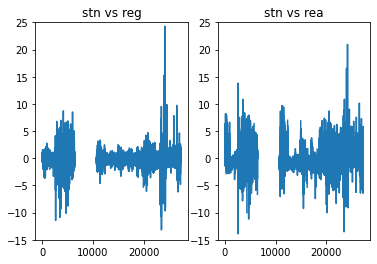

In [231]:
#### plt.figure(figsize=[15,5])
titles=['stn vs reg','stn vs rea']
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.plot(diff[:,i])
    plt.title(titles[i])
    plt.ylim([-15,25])

In [300]:
# p1=np.nanpercentile(abs(diff[:,0]), 99)
# p2=np.nanpercentile(met_reg[:,3], 99)
# ind_toxic1=np.where((abs(diff[:,0])>p1) & (met_reg[:,3]>p2))[0]

p1=np.nanpercentile(abs(diff[:,0]), 99)
p2=np.nanpercentile(abs(diff_near[:,1]), 95)
ind_toxic1=np.where((abs(diff[:,0])>p1) & (abs(diff_near[:,1])>p2))[0]
print(p1,p2)
print(np.shape(ind_toxic1))
print(ind_toxic1)

3.250855009555826 2.8231206417083747
(136,)
[  304   536  2591  2616  2617  2643  2683  2876  2940  2958  3158  3290
  3330  3387  3403  3491  3561  3593  3668  3671  3678  3713  3823  3877
  3970  4014  4159  4162  4166  4266  4340  4379  4447  4492  4500  4516
  4606  4629  4655  4695  4724  4750  4768  4810  4845  4914  4926  4929
  4948  4975  4986  5038  5041  5083  5118  5149  5152  5154  5159  5185
  5229  5236  5288  5381  5402  5586  5826  5856  6004  6026  6088  6240
 11392 11415 15545 18903 19753 19906 19938 20109 20117 20149 20150 20202
 20279 20363 20424 20829 21080 21345 23256 23421 23480 23487 23494 23505
 23507 23569 23582 23589 23605 23685 23795 23859 23871 23874 23883 23901
 23953 23972 23980 23983 23987 23998 24160 24180 24184 24217 24219 24233
 24239 24243 24250 24255 24280 24297 24309 24550 25924 26516 26646 26663
 26732 26983 27018 27242]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


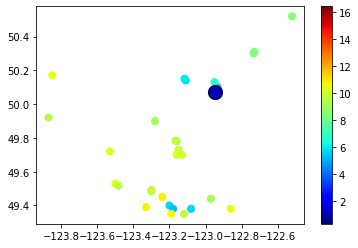

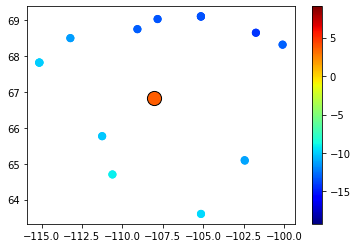

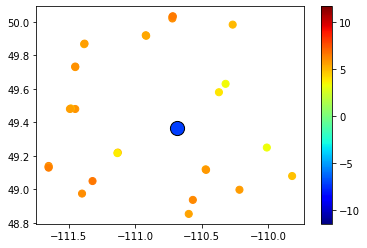

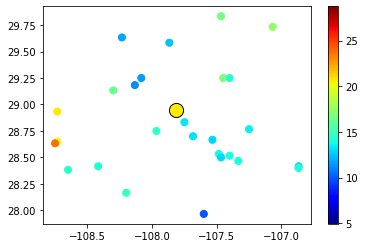

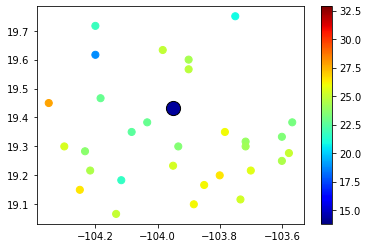

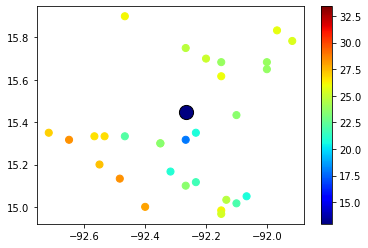

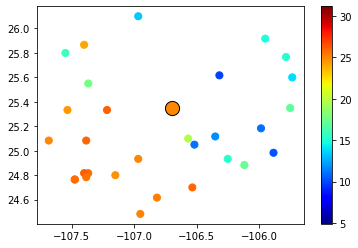

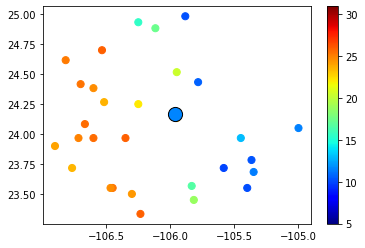

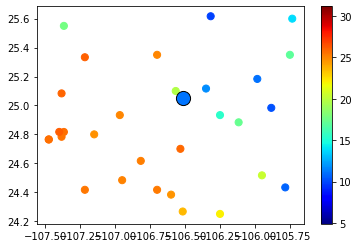

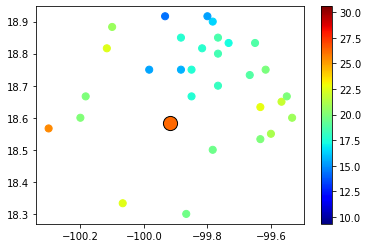

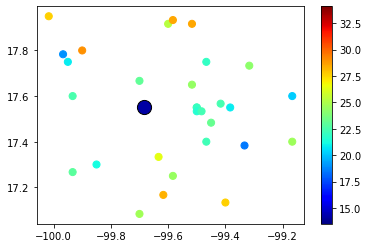

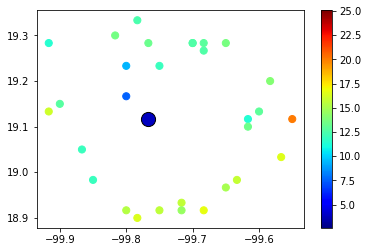

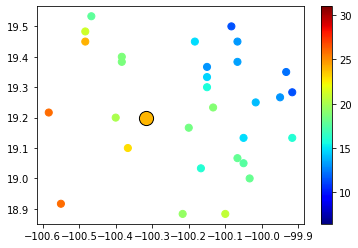

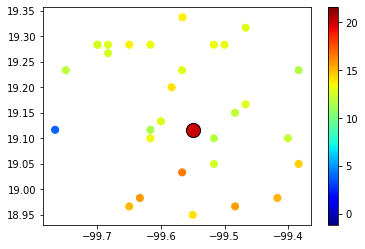

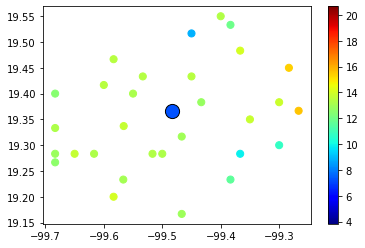

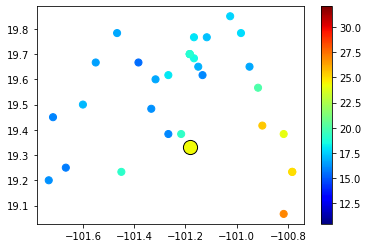

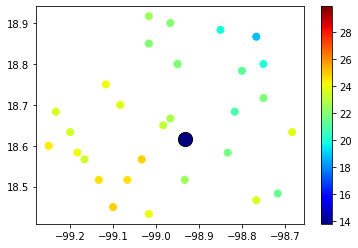

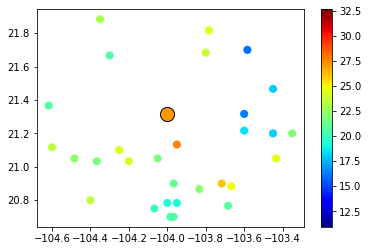

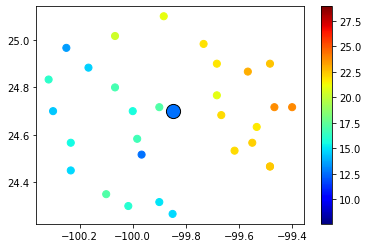

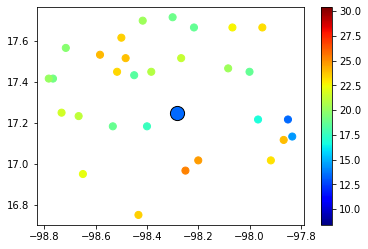

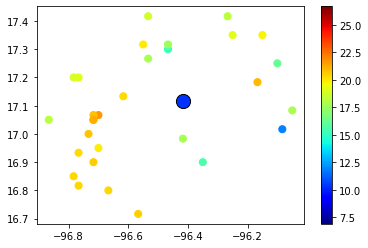

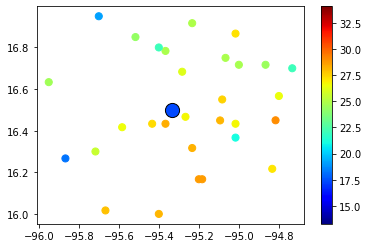

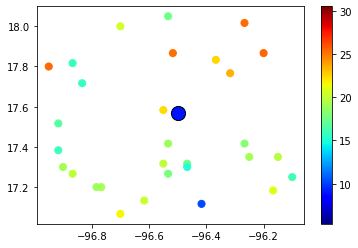

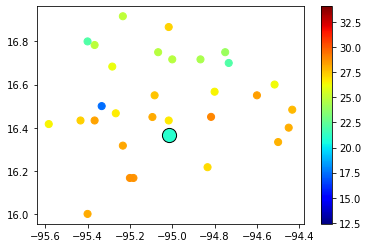

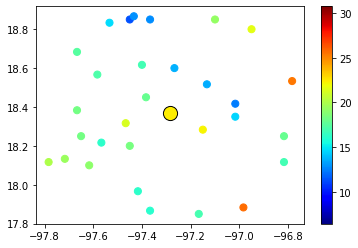

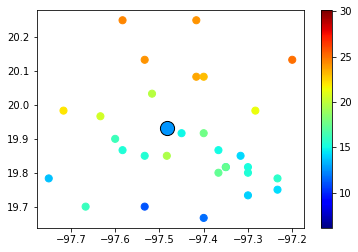

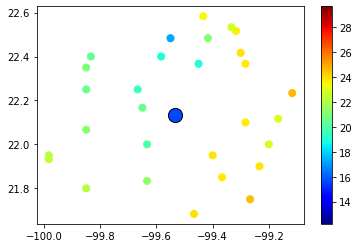

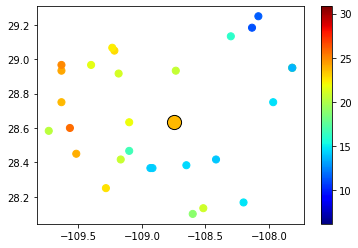

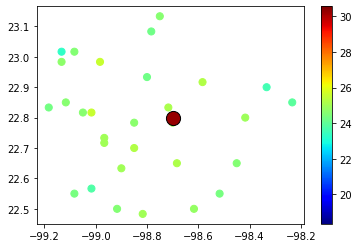

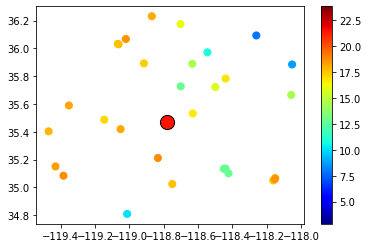

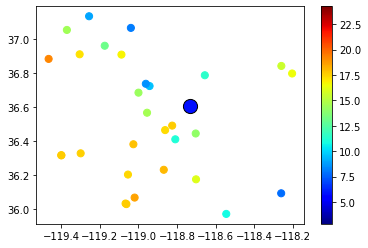

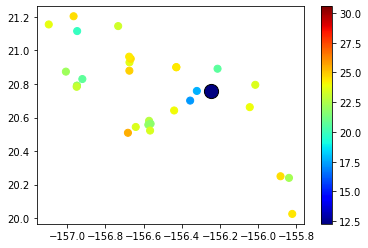

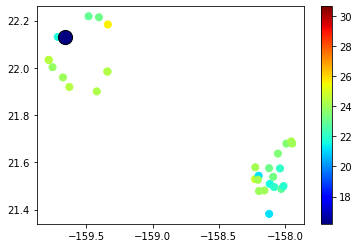

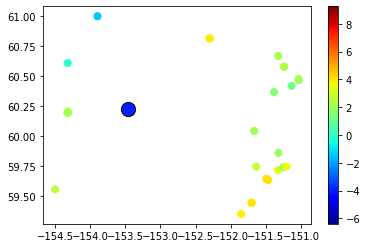

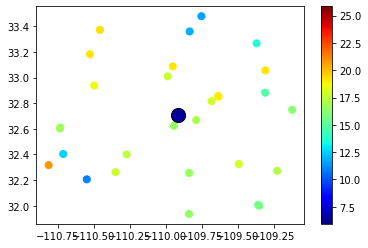

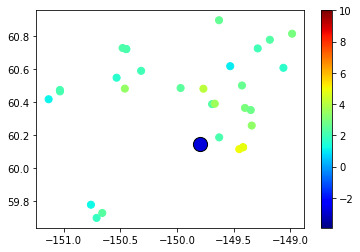

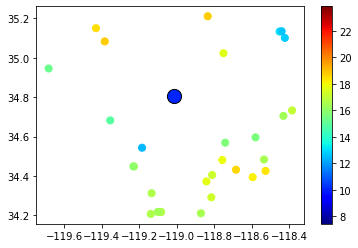

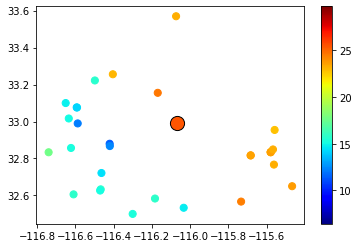

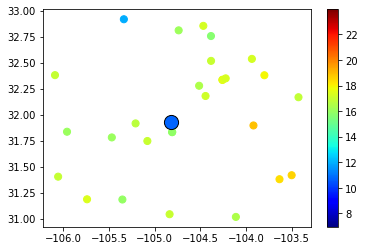

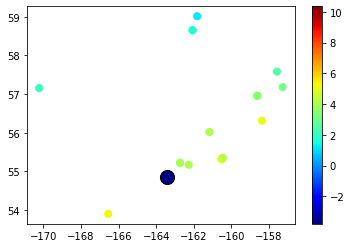

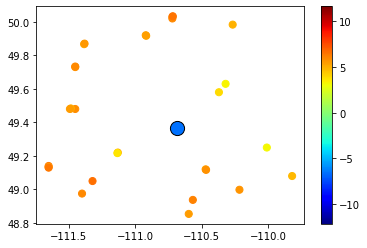

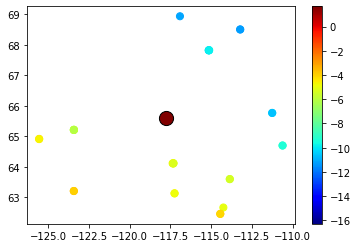

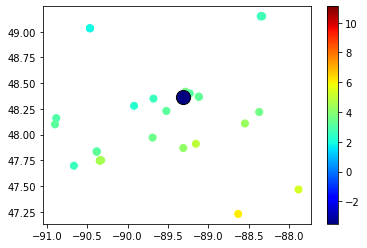

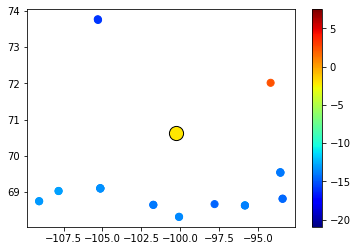

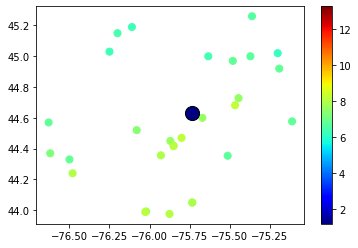

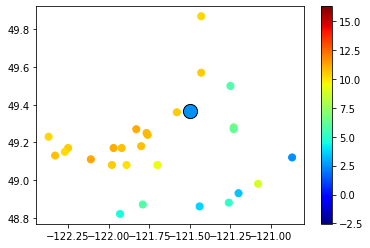

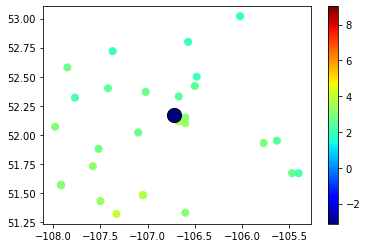

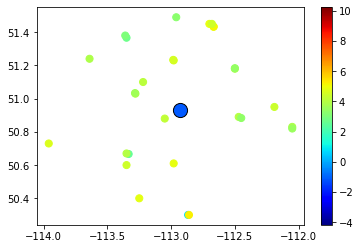

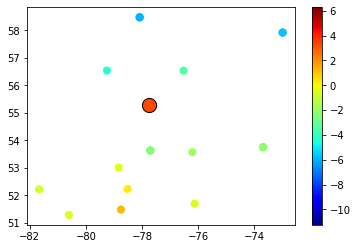

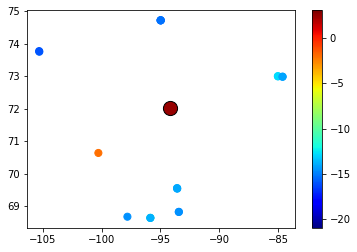

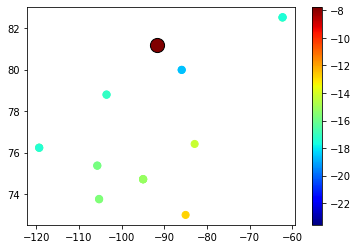

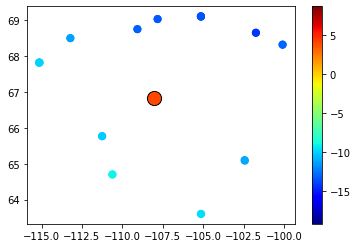

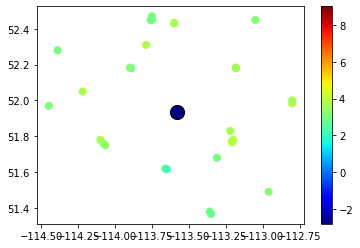

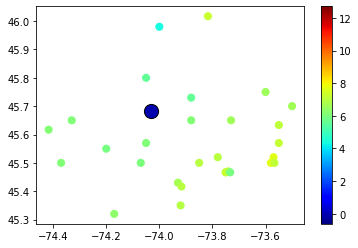

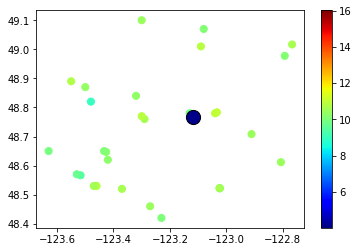

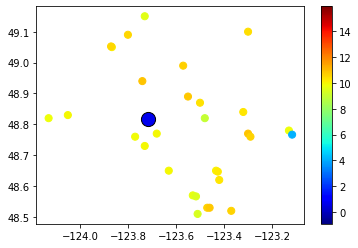

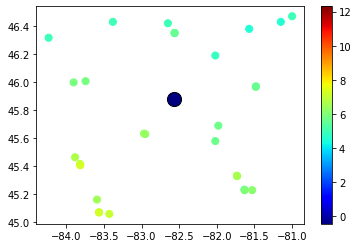

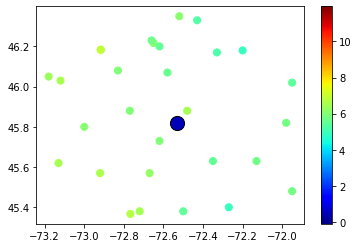

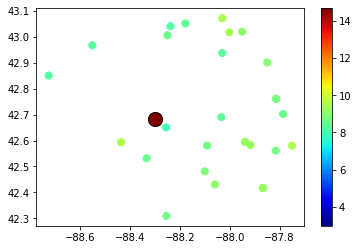

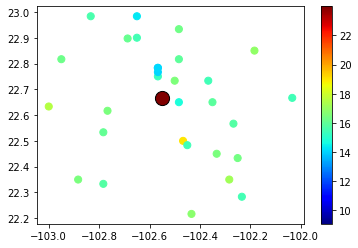

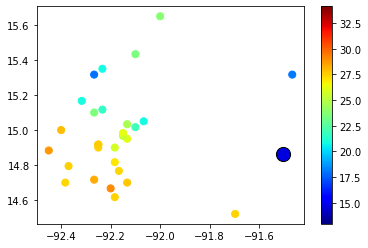

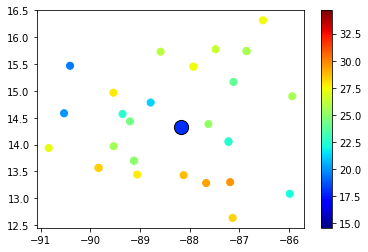

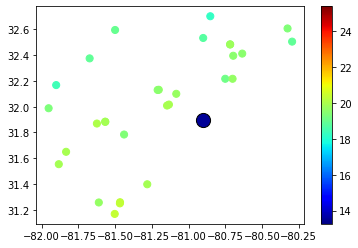

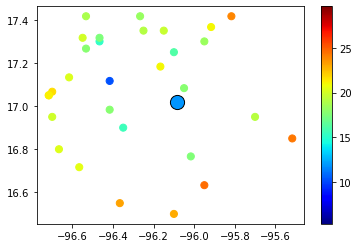

In [251]:
for i in range(len(ind_toxic1)):
    itar=ind_toxic1[i]
    inear=nearloc[itar]
    inear=inear[inear>-1]
#     print('tar stn',dstnm[itar])
#     print('tar reg',dregm[itar])
#     print('near stn',dstnm[inear])
    clim1=min(dstnm[inear])-5
    clim2=max(dstnm[inear])+5
    plt.scatter(stn_lle[inear,1],stn_lle[inear,0],50,dstnm[inear],cmap='jet')
    plt.clim([clim1,clim2])
    plt.scatter(stn_lle[itar,1],stn_lle[itar,0],200,dstnm[itar],cmap='jet',edgecolors=[0,0,0])
    plt.clim([clim1,clim2])
    plt.colorbar()
    plt.show()

# Spatial distribution after removing toxic stations

Text(0.5, 1.0, 'Toxic stations')

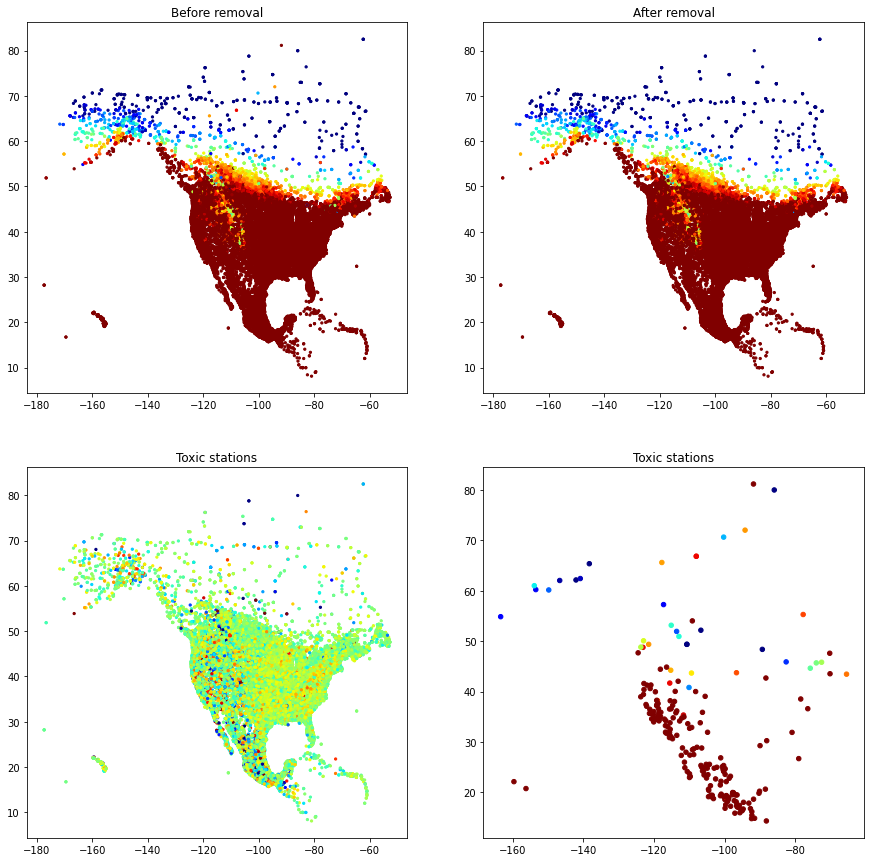

In [302]:
ind_toxic1=np.load('toxic_temp.npz')
ind_toxic1=ind_toxic1['toxic_temp']

plt.figure(figsize=[15,15])

plt.subplot(2,2,1)
plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dstnm,cmap='jet')
plt.clim([-5,5])
plt.title('Before removal')

plt.subplot(2,2,2)
dinput=dstnm.copy()
dinput[ind_toxic1]=np.nan
plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dinput,cmap='jet')
plt.clim([-5,5])
plt.title('After removal')

plt.subplot(2,2,3)
plt.scatter(stn_lle[:,1],stn_lle[:,0],5,dinput-dregm,cmap='jet')
plt.clim([-3,3])
plt.title('Toxic stations')

plt.subplot(2,2,4)
plt.scatter(stn_lle[ind_toxic1,1],stn_lle[ind_toxic1,0],20,dstnm[ind_toxic1],cmap='jet')
plt.clim([-5,5])
plt.title('Toxic stations')

(53.0, 55.0)

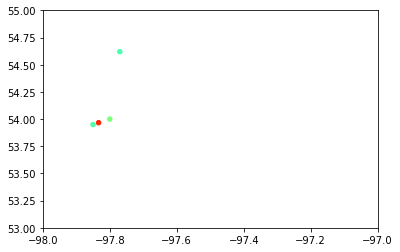

In [279]:
plt.scatter(stn_lle[:,1],stn_lle[:,0],20,dinput,cmap='jet')
plt.clim([-5,5])
plt.xlim([-98,-97])
plt.ylim([53,55])

In [286]:
ind1=np.where((stn_lle[:,0]>53)&(stn_lle[:,0]<55)&(stn_lle[:,1]>-98)&(stn_lle[:,1]<-97))[0]
print(stn_lle[ind1])
print(dstnm[ind1])

[[ 54.62    -97.77    216.1    ]
 [ 54.      -97.8     217.     ]
 [ 53.95    -97.85    224.     ]
 [ 53.96667 -97.83334 223.     ]]
[-0.60798013  0.03270092 -0.5823647   3.719947  ]


In [293]:
136/19900

0.006834170854271356